Análisis estadístico - Proyecto 2 STI - Diseño original

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

db = pd.read_csv('Base-de-datos-pruebas-Tyba.csv')

description = db.describe()

print(db)
print(description)

          Nombre  (Capacidad 1)  (Capacidad 2)  (Benevolencia 1)  \
0    Juan Felipe              4              4                 5   
1       Isabella              3              3                 5   
2      Margarita              4              4                 5   
3   Luis Eduardo              3              3                 4   
4      Guillermo              3              3                 5   
5         Andrés              4              4                 5   
6    Juan Manuel              4              3                 5   
7         Carlos              5              5                 4   
8      Alexander              5              5                 3   
9      Sebastian              4              4                 5   
10       Isabela              3              3                 4   
11         Isaac              2              2                 3   
12        Miguel              4              4                 4   
13        Daniel              2              2  

Variable Capacidad (C = x + T) - Nivel de aceptación

In [46]:
promedio_respuestas_capacidad = (db["(Capacidad 1)"] + db["(Capacidad 2)"]).mean()

print("La variable Capacidad presentó un promedio de aceptación de: ", promedio_respuestas_capacidad)

La variable Capacidad presentó un promedio de aceptación de:  6.714285714285714


Variable Benevolencia (B = b + d) - Nivel de aceptación

In [47]:
promedio_respuestas_benevolencia = (db["(Benevolencia 1)"] + db["(Benevolencia 2)"]).mean()

print("La variable Benevolencia presentó un promedio de aceptación de: ", promedio_respuestas_benevolencia)

La variable Benevolencia presentó un promedio de aceptación de:  8.333333333333334


Variable Integridad (I = t + r + h) - Nivel de aceptación

In [48]:
promedio_respuestas_integridad = (db["(Integridad 1)"] + db["(Integridad 2)"] + db["(Integridad 3)"]).mean()

print("La variable Integridad presentó un promedio de aceptación de: ", promedio_respuestas_integridad)

La variable Integridad presentó un promedio de aceptación de:  9.428571428571429


Nivel de correlación ente "Capacidad" e "Integridad"

In [49]:
db['Capacidad'] = db['(Capacidad 1)'] + db['(Capacidad 2)']
db['Integridad'] = db['(Integridad 1)'] + db['(Integridad 2)'] + db['(Integridad 3)']

correlation = db["Capacidad"].corr(db["Integridad"])

print("Coeficiente de correlación entre '(Capacidad)' y '(Integridad)':", correlation)

# El coeficiente de correlación varía entre -1 y 1.
# 1 indica una correlación positiva perfecta.
# -1 indica una correlación negativa perfecta.
# 0 indica una falta de correlación lineal.

Coeficiente de correlación entre '(Capacidad)' y '(Integridad)': 0.7874745450799601


Nivel de correlación ente "Capacidad", "Benevolencia" e "Integridad"

In [50]:
db['Capacidad general'] = db['(Capacidad 1)'] + db['(Capacidad 2)']
db['Benevolencia general'] = db['(Benevolencia 1)'] + db['(Benevolencia 2)']
db['Integridad general'] = db['(Integridad 1)'] + db['(Integridad 2)'] + db['(Integridad 3)']

columns_of_interest = ['Capacidad general', 'Benevolencia general', 'Integridad general']

correlation_variables = db[columns_of_interest].corr()

print("Nivel de correlación de las 3 variables es:")
print(correlation_variables)

# El coeficiente de correlación varía entre -1 y 1.
# 1 indica una correlación positiva perfecta.
# -1 indica una correlación negativa perfecta.
# 0 indica una falta de correlación lineal.

Nivel de correlación de las 3 variables es:
                      Capacidad general  Benevolencia general  \
Capacidad general              1.000000              0.382188   
Benevolencia general           0.382188              1.000000   
Integridad general             0.787475              0.274319   

                      Integridad general  
Capacidad general               0.787475  
Benevolencia general            0.274319  
Integridad general              1.000000  


Histograma

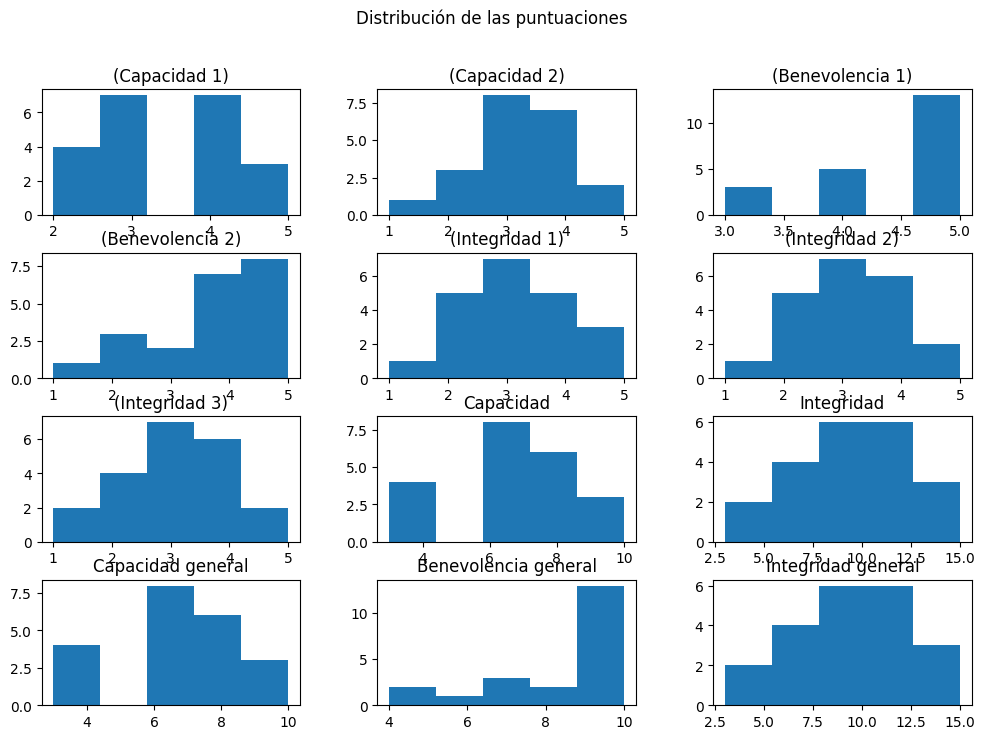

In [51]:
db.hist(figsize=(12, 8), bins=5, grid=False)
plt.suptitle("Distribución de las puntuaciones")
plt.show()

Identificación de outliers (valores atípicos)

In [52]:
numeric_cols = db.drop(columns=['Nombre'])

Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = pd.DataFrame()

for column in numeric_cols.columns:
    column_outliers = (db[column] < lower_bound[column]) | (db[column] > upper_bound[column])
    outliers[column] = column_outliers

print("Número de outliers por columna:")
print(outliers.sum())

Número de outliers por columna:
(Capacidad 1)           0
(Capacidad 2)           1
(Benevolencia 1)        0
(Benevolencia 2)        0
(Integridad 1)          0
(Integridad 2)          0
(Integridad 3)          0
Capacidad               0
Integridad              0
Capacidad general       0
Benevolencia general    0
Integridad general      0
dtype: int64


Nivel de Confianza (suma de los promedios de las variables)

In [53]:
nivel_confianza = promedio_respuestas_capacidad + promedio_respuestas_benevolencia + promedio_respuestas_integridad

print("El nivel de confianza con el diseño-servicio original es:", nivel_confianza)

El nivel de confianza con el diseño-servicio original es: 24.476190476190474


El valor máximo de los resultados es "5"

In [54]:
valor_maximo_posible = 35

Porcentaje del Nivel de Confianza

In [55]:
porcentaje_confianza = (nivel_confianza / valor_maximo_posible) * 100

print("El porcentaje de confianza es:", porcentaje_confianza)

El porcentaje de confianza es: 69.93197278911563
